In [58]:
import pandas as pd
import string
import matplotlib.pyplot as plt

df = pd.read_csv('archives.csv')

for i in range(0, df.shape[0], 2):
    df = df.drop(i)

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date')

def remove_stop_symbols(text):
    return ''.join(char for char in text if char not in set(string.punctuation))

df['tokenized_text'] = df['Text'].apply(lambda x: remove_stop_symbols(x.lower()).split())

all_words = [word for tokens in df['tokenized_text'] for word in tokens]

word_frequency = pd.Series(all_words).value_counts().reset_index()
word_frequency.columns = ['word', 'frequency']

df = df.drop('tokenized_text', axis=1)

In [59]:
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

word_frequency = word_frequency[~word_frequency['word'].isin(stopwords)]
word_frequency = word_frequency.reset_index()
word_frequency = word_frequency.drop('index', axis=1)

word_frequency.head(10)

,word,frequency
0,varta1,1332
1,новини,1293
2,varta1comua,1290
3,україни,1209
4,укриття,1039
5,умови,778
6,має,759
7,львова,722
8,використання,682
9,подій,674


In [60]:
print('Найпопулярніші слова: ', word_frequency.head(10))

Найпопулярніші слова:             word  frequency
0        varta1       1332
1        новини       1293
2   varta1comua       1290
3       україни       1209
4       укриття       1039
5         умови        778
6           має        759
7        львова        722
8  використання        682
9         подій        674


In [61]:
word_frequency.to_csv('word_frequency.csv', index=True)

df.to_csv('archives_clear.csv', index=False)

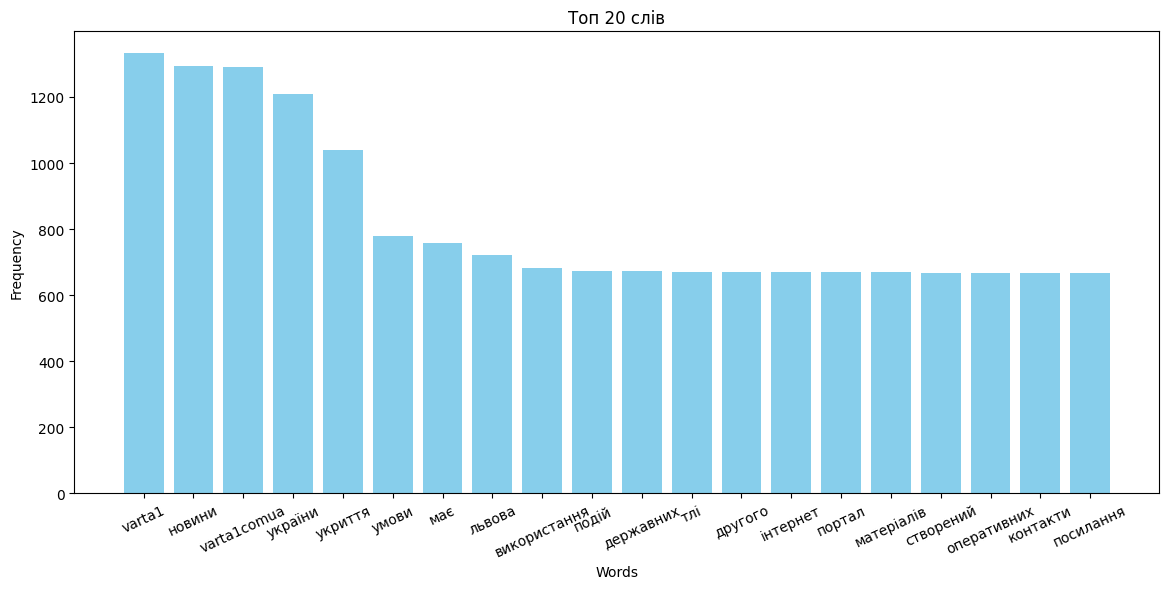

In [62]:
plt.figure(figsize=(14, 6))
plt.bar(word_frequency['word'][:20], word_frequency['frequency'][:20], color='skyblue')
plt.title('Топ 20 слів')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=25)
plt.show()